In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [2]:
df = pd.read_csv("Students Social Media Addiction.csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [3]:
X = df[['Sleep_Hours_Per_Night']]
y = df['Mental_Health_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.67, random_state=123)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [5]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"R²: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")

R²: 0.508
MSE: 0.601
MAE: 0.634


In [6]:
residuals = y_test - predictions
residuals.mean()

np.float64(0.03333101104150082)

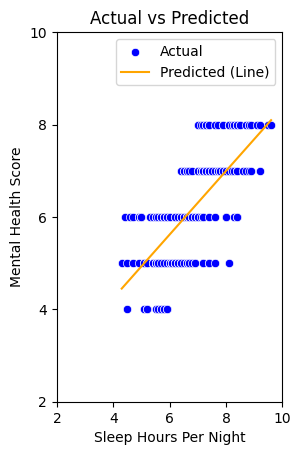

In [10]:
# Plot 1: Actual vs Predicted

sorted_indices = np.argsort(X_test.values.flatten())
X_sorted = X_test.values.flatten()[sorted_indices]
y_test_sorted = y_test.values.flatten()[sorted_indices]
y_pred_sorted = predictions[sorted_indices]

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_sorted, y=y_test_sorted, color='blue', label='Actual')
plt.plot(X_sorted, y_pred_sorted, color='orange', label='Predicted (Line)')
plt.xlabel('Sleep Hours Per Night')
plt.xticks([2,4,6,8,10])
plt.yticks([2,4,6,8,10])
plt.ylabel('Mental Health Score')
plt.title('Actual vs Predicted')
plt.legend()


Text(0.5, 1.0, 'Residuals Plot')

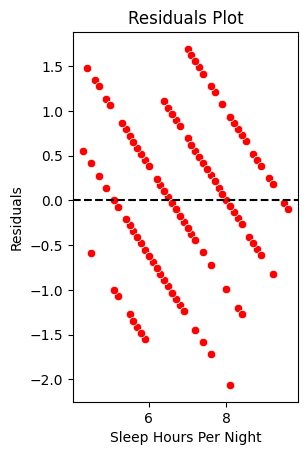

In [8]:
# Plot 2: Residuals Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test.values.flatten(), y=residuals, color='red')
plt.axhline(0, linestyle='--', color='black')
plt.xlabel('Sleep Hours Per Night')
plt.ylabel('Residuals')
plt.title('Residuals Plot')